In [30]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [68]:
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')

In [66]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [33]:
long = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2Flux_20210501_20211231.nc')
alkalinity = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2Flux_alkalinity_20210501_20211231.nc')


In [34]:
long

<xarray.Dataset>
Dimensions:   (time: 8, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) datetime64[ns] 2021-05-15T12:00:00 ... 2021-12-15T12:00:00
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2Flux_20210501_20211231
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-12-12 01:51 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [35]:
alkalinity

<xarray.Dataset>
Dimensions:   (time: 8, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) datetime64[ns] 2021-05-15T12:00:00 ... 2021-12-15T12:00:00
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2Flux_alkalinity_20210501_...
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-12-12 09:44 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

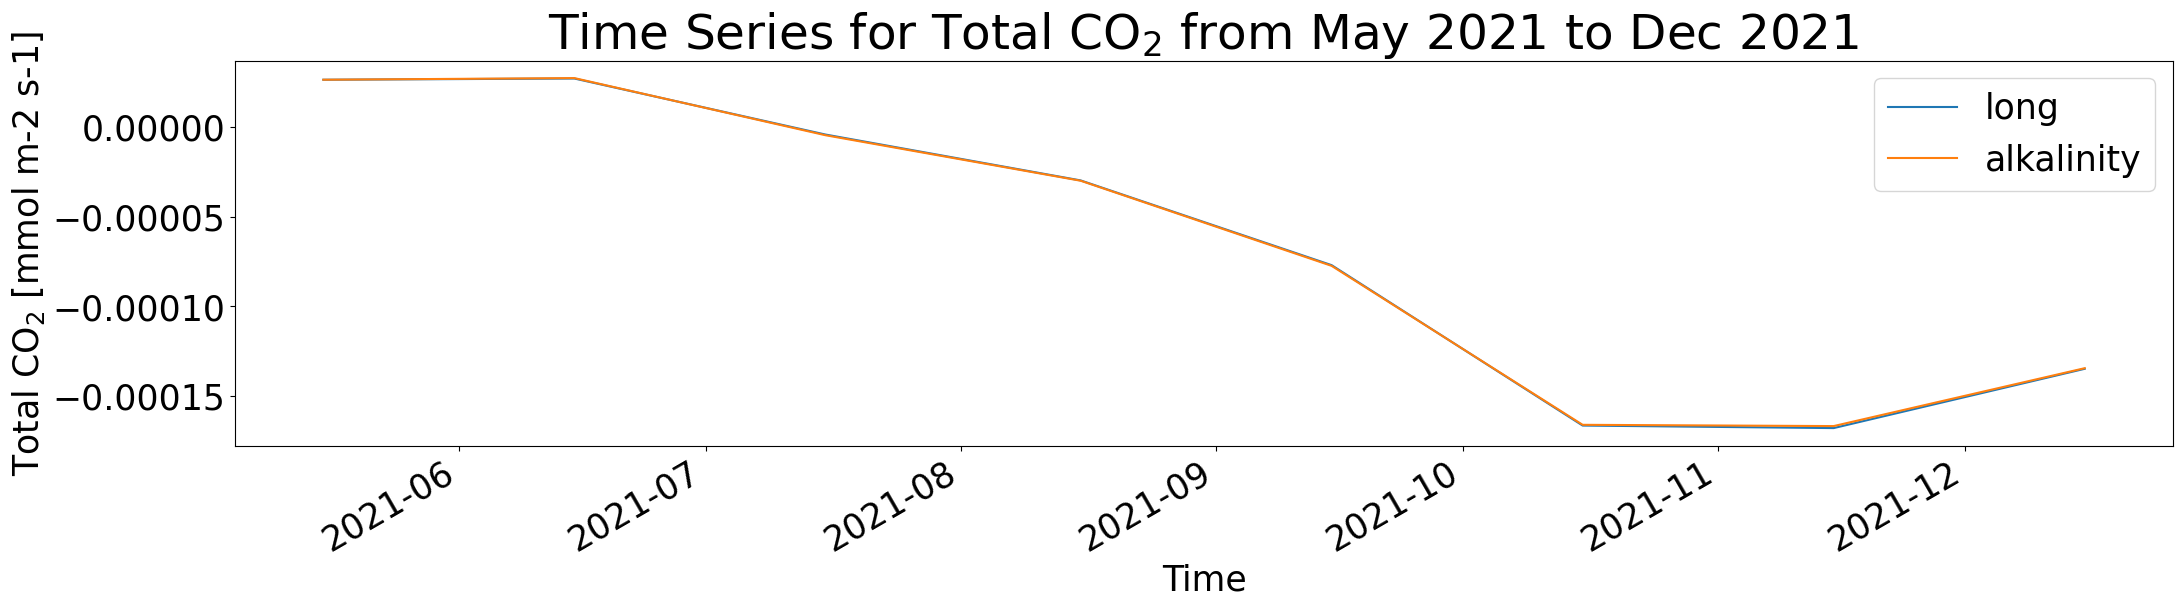

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 25})
total_long = (long['CO2_flux'] * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1) / area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_long.plot(ax= axs, label = "long")
total_alkalinity = (alkalinity['CO2_flux'] * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1) / area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_alkalinity.plot(ax= axs, label = "alkalinity")
axs.legend()
axs.set_title(f'Time Series for Total CO$_2$ from May 2021 to Dec 2021', fontsize = 35)
axs.set_xlabel('Time')
axs.set_ylabel('Total CO$_2$ [mmol m-2 s-1]')
axs.tick_params(axis='both', which='major')

In [70]:
diff = alkalinity['CO2_flux'] - long['CO2_flux']
diff

<xarray.DataArray 'CO2_flux' (time: 8, gridY: 898, gridX: 398)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) datetime64[ns] 2021-05-15T12:00:00 ... 2021-12-15T12:00:00

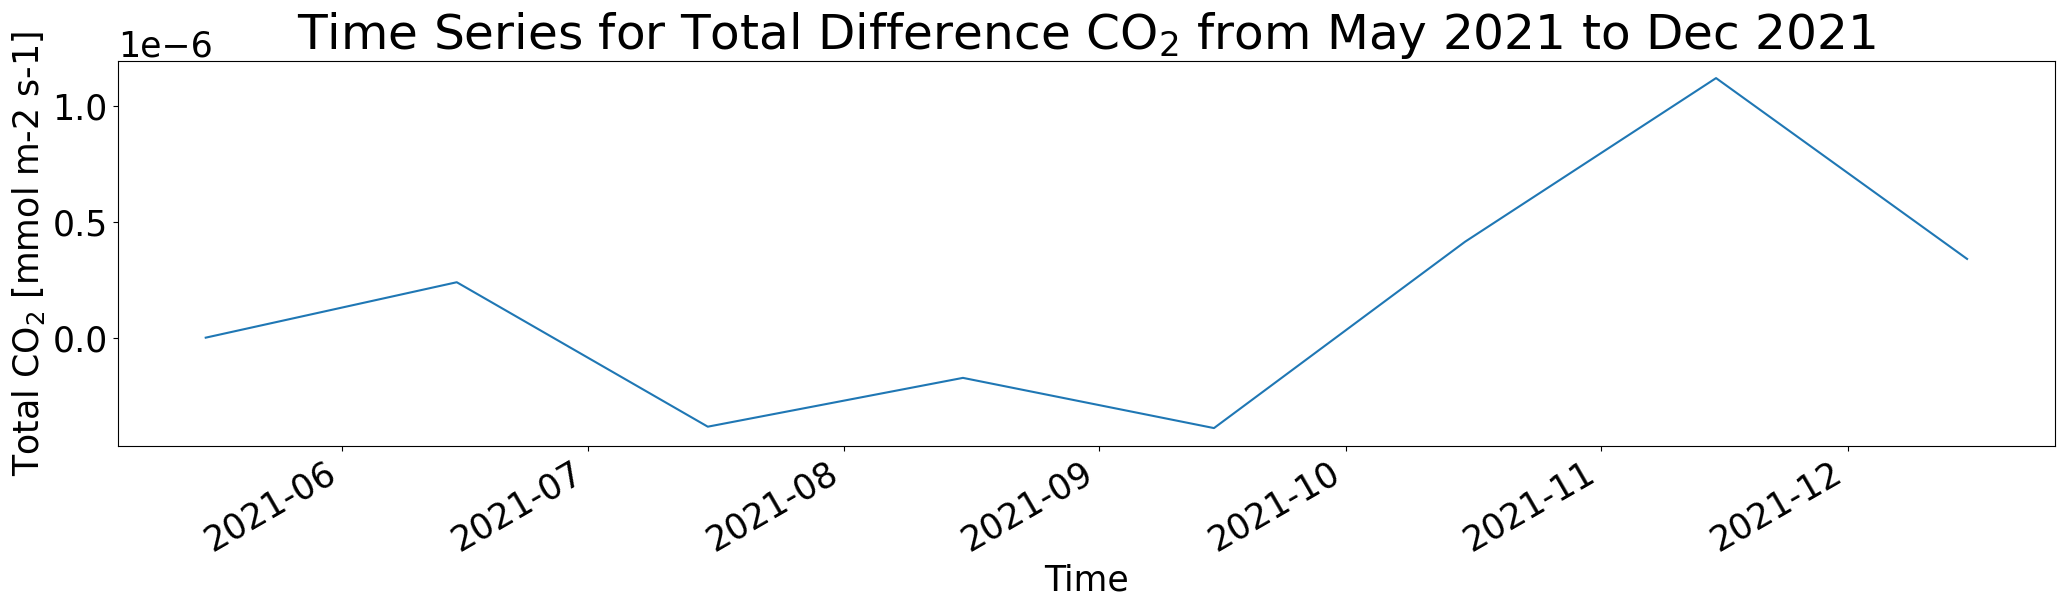

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 25})
total_diff = (diff * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1)/ area.where(tmask.isel(deptht = 0)).sum(axis = 0).sum(axis = 0)
total_diff.plot()
axs.set_title(f'Time Series for Total Difference CO$_2$ from May 2021 to Dec 2021', fontsize = 35)
axs.set_xlabel('Time')
axs.set_ylabel('Total CO$_2$ [mmol m-2 s-1]')
axs.tick_params(axis='both', which='major')

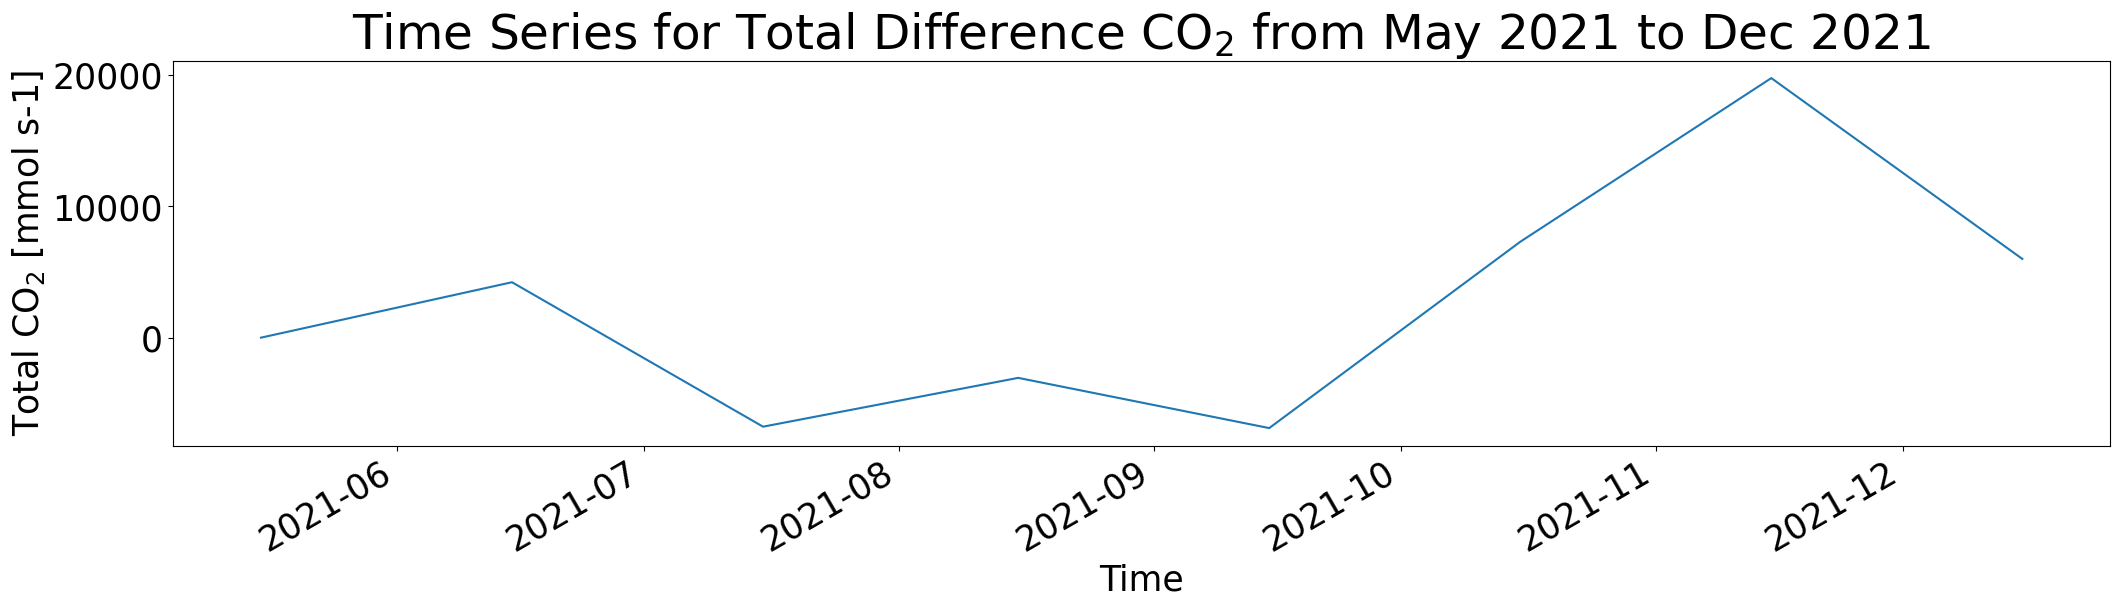

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(25, 5))
plt.rcParams.update({'font.size': 25})
total_diff = (diff * area).where(tmask.isel(deptht = 0)).sum(axis = 1).sum(axis = 1)
total_diff.plot()
axs.set_title(f'Time Series for Total Difference CO$_2$ from May 2021 to Dec 2021', fontsize = 35)
axs.set_xlabel('Time')
axs.set_ylabel('Total CO$_2$ [mmol s-1]')
axs.tick_params(axis='both', which='major')

In [74]:
outfall_long = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_longrun_outfall_20211101_20211130.nc')
outfall_alka = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_alkalinity_outfall_20211101_20211130.nc')
outfall_alka

<xarray.Dataset>
Dimensions:  (time: 1, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) datetime64[ns] 2021-11-15
Data variables:
    outfall  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_alkalinity_outfall_20211101_...
    description:  Month-averaged Outfall extracted from SalishSeaCast v202111...
    history:      2023-12-14 13:49 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

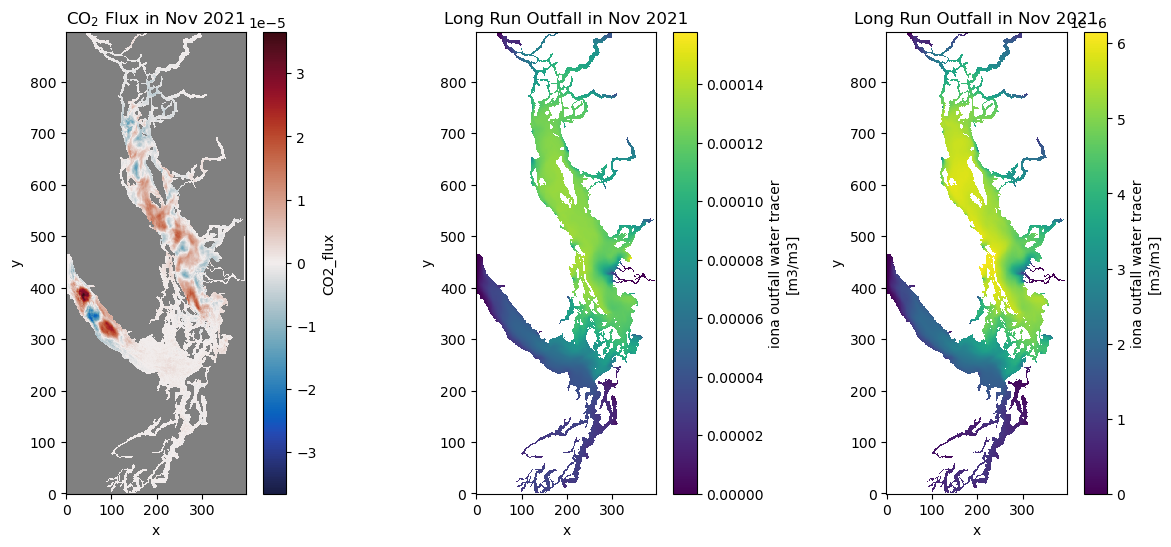

In [80]:
fig, axss = plt.subplots(1, 3, figsize=(15, 6))
diff[6].where(tmask.isel(depth = 0)).plot(ax = axss[0], cmap = cm_bwr)
outfall_long['outfall'].isel(time = 0, depth = 0).where(tmask.isel(depth = 0)).plot(ax = axss[1])
outfall_alka['outfall'].isel(time = 0, depth = 0).where(tmask.isel(depth = 0)).plot(ax = axss[2])


axss[0].set_xlabel('x')
axss[0].set_ylabel('y')
axss[0].set_title('CO$_2$ Flux in Nov 2021')

axss[1].set_xlabel('x')
axss[1].set_ylabel('y')
axss[1].set_title('Long Run Outfall in Nov 2021')

axss[2].set_xlabel('x')
axss[2].set_ylabel('y')
axss[2].set_title('Long Run Outfall in Nov 2021')

for i in axss:
    viz_tools.set_aspect(i)
